## Off-Facebook Activity Report
## Author: Alexander Hillwig

### Overview

In this report, I want to analyze the data of advertisers that accessed my facebook data to determine which ads to show me and draw conclusions from the data

My hypothesis is that the majority of my off-facebook data is tech/computer related 

### Data
For this report the data was retrieved from Facebook through the request page. If you want to examine your own Facebook data you can do it here: https://www.facebook.com/dyi/?referrer=yfi_settings. Once downloaded a file named "your_off_facebook_activity.json" is found and loaded into the environment. Json is the format of the data and how it will be read.

As a starting point, I needed to import json, datetime, maptlotlib(pyplot), numpy, time and panda libraries for Python 3

In [2]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

In [3]:
with open(r'C:\Users\jchil\Documents\Classes_21-22\DataInEmat\FacebookData\facebook-alexhillwig\ads_and_businesses\your_off-facebook_activity.json') as f:
    act = json.load(f)
act.keys()

dict_keys(['off_facebook_activity'])

In [4]:
type(act['off_facebook_activity'])

list

Here I look at one element of my dataset to refer back to as I work with the data. I chose the very last data point in the dataset in order to show how many entries this dataset has to compare.

I can see from this how the data is structured, and it shows the name of the app/website that accessed my data under 'name' and the type and timestamp of the most recent access under the 'events' header and the 'type' and 'timestamp' subheaders

In [5]:
act['off_facebook_activity'][266]

{'name': 'Mario Kart Tour',
 'events': [{'id': 879655999057980,
   'type': 'ACTIVATE_APP',
   'timestamp': 1580566560}]}

Here I show what the primary headers are by pulling them from the '0' (1st) element of the dataset

In [6]:
act['off_facebook_activity'][0].keys()

dict_keys(['name', 'events'])

In [7]:
act['off_facebook_activity'][0]['events'][0]['type']

'PAGE_VIEW'

Now I use a for loop to append the data that I am trying to work with to new lists under names such as 'apps', 'actapp', and 'custom'

In [8]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []

for i in act['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))

Now I turn the new list data into a dataframe and show it in a readable table format showing the first 30 apps/sites that accessed my data

In [9]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent.head(50)

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
0,razer.com,13,0,0,0,4,0,9
1,nvidia.com,23,0,0,0,1,0,22
2,hulu.com,8,0,0,0,0,0,7
3,Hulu: Stream all your favorite TV shows and mo...,3,0,3,0,0,0,0
4,"Bumble â Dating, Make New Friends & Networking",93,92,1,0,0,0,0
5,Spotify: Listen to new music and play podcasts,116,51,65,0,0,0,0
6,spotify.com,7,0,0,0,0,0,7
7,quizlet.com,7,0,0,0,7,0,0
8,CBSi,14,0,14,0,0,0,0
9,etonline.com,1,0,0,0,0,0,1


Now I wanted to show the data in a more condensed format, so I plotted the dataframe as a bar graph showing the total times that the top 50 apps/sites accessed my data, and sorted them descending in frequency of access

A:\Programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\Programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\Programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\Programs\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
A:\Programs\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)
A:\Programs\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


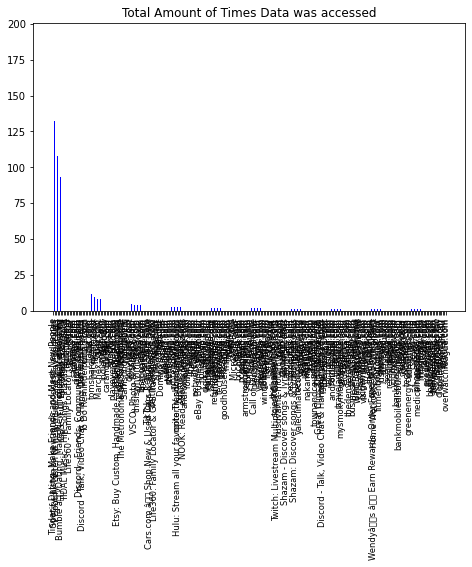

In [10]:
appbyevent = appbyevent.sort_values(by = ['Event Count'], ascending = False)
X = np.arange(266)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, appbyevent['Event Count'][0:266], color = 'b', width = .1)
plt.xticks(ticks=X+.2, labels = list(appbyevent['App'][0:266]), rotation=90, fontsize = 'small')
plt.title('Total Amount of Times Data was accessed')
plt.show()

Plotting all of the data was hard to read, so I took a sample of the top 50 apps that accessed my data and plotted them again

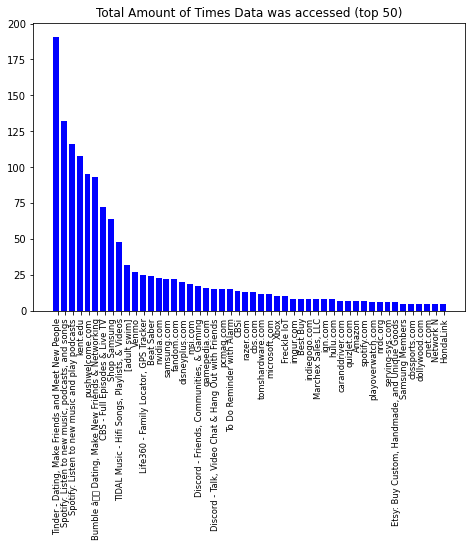

In [11]:
appbyevent = appbyevent.sort_values(by = ['Event Count'], ascending = False)
X = np.arange(50)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, appbyevent['Event Count'][0:50], color = 'b', width = .75)
plt.xticks(ticks=X+.2, labels = list(appbyevent['App'][0:50]), rotation=90, fontsize = 'small')
plt.title('Total Amount of Times Data was accessed (top 50)')
plt.show()

## Analysis

The analysis revealed the top apps that accessed my data > 45 times and also showed the ammount of times that the rest of the apps accessed my data

## Conclusions, Limitations, Alternative Approaches, & Next Steps

As I analyzed the data, I discovered that there were remarkably few "Tech" or "Computer" related companies in the top 50 comapnies that accessed my data, and instead comapnies such as Tinder and Spotify having over 100 accesses and tech companies NVIDIA and MSI only accessing my data udner 30 times.

Out of the top 50 companies, only 10 would be considered "Tech" related, with the vast majority of access coming from social sites like Tinder or Bumble and audio/video streaming apps like Spotify, Tidal, CBS or Disney+.

From this I can state that my hypothesis (that a majority of the sites that accessed my data were tech/computer related companies) was wrong, with a vast majority of access actually coming from social sites and streaming platforms such as Tinder or CBS.

In the future, I could run a t test to see if there was correlation between tech companies and their use of my data or streaming companies and the use of my data. This could better help me compare the types of companies and how the use of my data changes.